# pca.ipynb
This notebook explores principal component analysis of elliptic fourier descriptors to differentiate shapes of coconut palms detected in images.

In [67]:
import roadside as rs
import sqlite3
import pandas as pd
from icecream import ic
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [68]:
db_path = 'sam3_detections.sqlite3'
sql = '''
SELECT * FROM detections
ORDER BY image_path, confidence DESC, object_index;
'''

In [69]:
# Get data
conn = sqlite3.connect(db_path)
df = pd.read_sql(sql, conn)
conn.close()

df.head()

,image_path,object_index,class_id_x,poly_wkt,x_min,y_min,x_max,y_max,confidence,class_id_y
0,08hs-palms-03-zglw-superJumbo.webp,1,0.0,"POLYGON ((486 679, 486 684, 485 685, 485 688, ...",354.5,683.500,593.5,2068.0,0.928711,0.0
1,08hs-palms-03-zglw-superJumbo.webp,0,0.0,"POLYGON ((1035 1274, 1035 1276, 1034 1277, 103...",701.0,1273.000,1103.0,2066.0,0.920898,0.0
2,20251129_152106.jpg,16,0.0,"POLYGON ((1154 233, 1153 234, 1151 234, 1150 2...",939.5,232.875,1329.0,997.5,0.842285,0.0
3,20251129_152106.jpg,5,0.0,"POLYGON ((1681 715, 1680 716, 1680 717, 1675 7...",1592.0,715.500,1778.0,905.5,0.771484,0.0
4,20251129_152106.jpg,9,0.0,"POLYGON ((1013 829, 1008 834, 1006 834, 1003 8...",963.0,828.500,1055.0,985.5,0.763672,0.0


In [70]:
features = []
feature_ids = []
confidence_list = []
for i, r in df.iterrows():  
    poly_wkt = r['poly_wkt']
    contour  = rs.conv_poly_from_wkt_to_array(poly_wkt)
    raw_coeffs = rs.calculate_efd(contour, harmonics=50)
    vector = rs.get_feature_vector(raw_coeffs)
    if not np.isnan(vector).any():
        features.append(vector)
        feature_ids.append(f'{r['image_path']}-{r['object_index']}') 
        confidence_list.append(r['confidence'])  

ic| np.min(dt): np.float64(1.0)
ic| 'closing contour'
ic| np.min(dt): np.float64(0.14944577259689115)
ic| np.min(dt): np.float64(1.0)
ic| 'closing contour'
ic| np.min(dt): np.float64(0.5001758787613922)
ic| np.min(dt): np.float64(1.0)
ic| 'closing contour'
ic| np.min(dt): np.float64(0.23673377429817735)
ic| np.min(dt): np.float64(1.0)
ic| 'closing contour'
ic| np.min(dt): np.float64(0.15216525858820149)
ic| np.min(dt): np.float64(1.0)
ic| 'closing contour'
ic| np.min(dt): np.float64(0.046754498321063646)
ic| np.min(dt): np.float64(1.0)
ic| 'closing contour'
ic| np.min(dt): np.float64(0.10566526247034698)
ic| np.min(dt): np.float64(1.0)
ic| 'closing contour'
ic| np.min(dt): np.float64(0.521705217029149)
ic| np.min(dt): np.float64(1.0)
ic| 'closing contour'
ic| np.min(dt): np.float64(0.027936581161352694)
ic| np.min(dt): np.float64(0.0)
/home/aubrey/Desktop/sam3-2026-01-31/roadside.py:347: RuntimeWarning:

invalid value encountered in divide

/home/aubrey/Desktop/sam3-2026-01-31/roadside

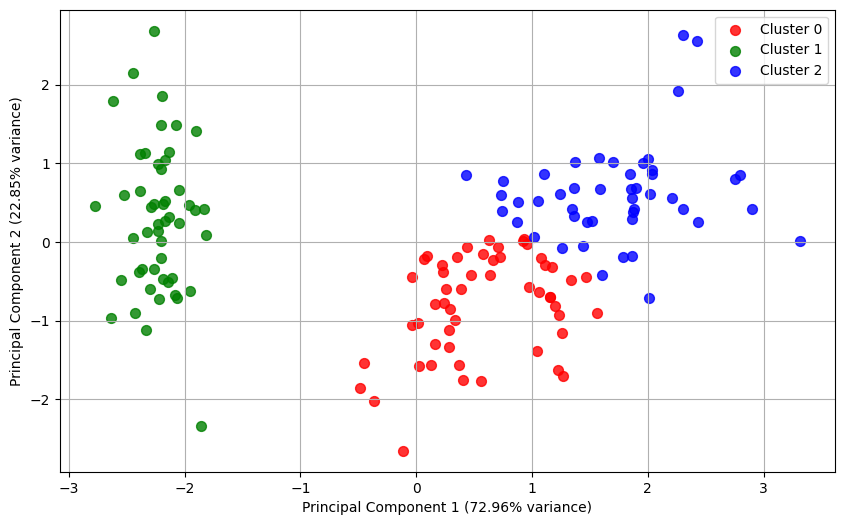

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from icecream import ic

# 1. Load and Preprocess the Data
# Load a sample dataset (Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# It is good practice to scale the data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply k-means Clustering
# We'll use 3 clusters, known for the Iris dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# 3. Apply PCA to reduce dimensions for visualization
# Reduce the data to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for easier plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = cluster_labels # Add the k-means cluster labels
# pca_df['target'] = y # Add the original target labels for comparison

# 4. Visualize the results
plt.figure(figsize=(10, 6))

# Define colors for the clusters
colors = ['red', 'green', 'blue']

# Plot points, colored by their assigned cluster
for cluster_id, color in enumerate(colors):
    # Select data points belonging to the current cluster
    cluster_data = pca_df[pca_df['cluster'] == cluster_id]
    plt.scatter(
        cluster_data['PC1'],
        cluster_data['PC2'],
        c=color,
        label=f'Cluster {cluster_id}',
        s=50,  # Size of points
        alpha=0.8 # Transparency
    )

# Optionally, visualize the cluster centers (projected into the PCA space)
# Note: Projecting the centers is more involved; the above plots the actual data points.

plt.title = 'PCA Visualization with k-means Clusters (Iris Dataset)'
plt.xlabel(f'Principal Component 1 ({round(pca.explained_variance_ratio_[0]*100, 2)}% variance)')
plt.ylabel(f'Principal Component 2 ({round(pca.explained_variance_ratio_[1]*100, 2)}% variance)')
plt.legend()
plt.grid(True)
plt.show()


In [72]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

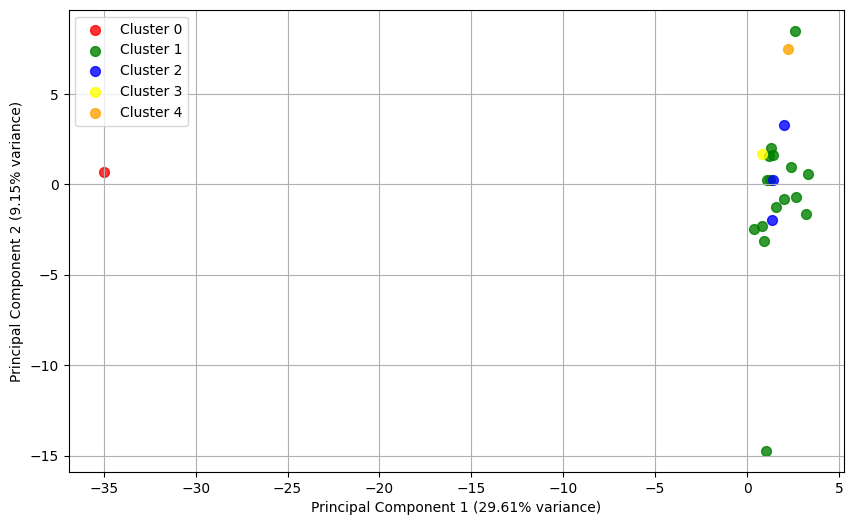

In [77]:
# MY PLOT

# 1. Load and Preprocess the Data
# Load a sample dataset (my dataset)
# iris = load_iris()
X = iris.data
X = np.array(features)

# y = iris.target
# target_names = iris.target_names

# It is good practice to scale the data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply k-means Clustering
# We'll use 3 clusters, known for the Iris dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# 3. Apply PCA to reduce dimensions for visualization
# Reduce the data to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for easier plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = cluster_labels # Add the k-means cluster labels
pca_df['id'] = feature_ids
pca_df['confidence'] = confidence_list
# pca_df['target'] = y # Add the original target labels for comparison

# 4. Visualize the results
plt.figure(figsize=(10, 6))

# Define colors for the clusters
colors = ['red', 'green', 'blue', 'yellow', 'orange']

# Plot points, colored by their assigned cluster
for cluster_id, color in enumerate(colors):
    # Select data points belonging to the current cluster
    cluster_data = pca_df[pca_df['cluster'] == cluster_id]
    plt.scatter(
        cluster_data['PC1'],
        cluster_data['PC2'],
        c=color,
        label=f'Cluster {cluster_id}',
        s=50,  # Size of points
        alpha=0.8 # Transparency
    )
    
    

# Optionally, visualize the cluster centers (projected into the PCA space)
# Note: Projecting the centers is more involved; the above plots the actual data points.

plt.title = 'PCA Visualization with k-means Clusters (Iris Dataset)'
plt.xlabel(f'Principal Component 1 ({round(pca.explained_variance_ratio_[0]*100, 2)}% variance)')
plt.ylabel(f'Principal Component 2 ({round(pca.explained_variance_ratio_[1]*100, 2)}% variance)')
plt.legend()
plt.grid(True)
plt.show()


In [78]:
pca_df.sort_values('cluster')

,PC1,PC2,cluster,id,confidence
20,-34.997394,0.670867,0,20251129_152106.jpg-17,0.280518
0,0.914830,-3.147584,1,08hs-palms-03-zglw-superJumbo.webp-1,0.928711
5,3.198570,-1.635972,1,20251129_152106.jpg-3,0.743164
3,0.825698,-2.311978,1,20251129_152106.jpg-5,0.771484
6,1.193309,1.568921,1,20251129_152106.jpg-12,0.729980
7,3.327654,0.570721,1,20251129_152106.jpg-2,0.698730
10,1.051908,-14.735445,1,20251129_152106.jpg-24,0.630371
4,2.028943,-0.833471,1,20251129_152106.jpg-9,0.763672
15,1.288597,2.023862,1,20251129_152106.jpg-4,0.479980
13,2.579331,8.493328,1,20251129_152106.jpg-15,0.535156


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Load Example Data (Wine Dataset)
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# 2. Standardize the data (Crucial for PCA and KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 3. Apply PCA (Reduce to 2 dimensions for 2D visualization)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df['mytext'] = 'mytext'

# 4. Perform K-Means Clustering
# We'll use 3 clusters as there are 3 types of wine in the dataset
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled) # Fitting on scaled data is better than just PCA components
pca_df['Cluster'] = kmeans.labels_.astype(str) # Convert to string for discrete color mapping

# 5. 2D Visualization using Plotly
fig = px.scatter(
    pca_df, 
    x='PC1', 
    y='PC2', 
    color='Cluster',
    title='K-Means Clustering (3 Clusters) visualized via PCA',
    labels={'PC1': f'PC1 ({round(pca.explained_variance_ratio_[0]*100, 2)}% Var)',
            'PC2': f'PC2 ({round(pca.explained_variance_ratio_[1]*100, 2)}% Var)'},
    hover_data=['mytext'],
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Customize look
fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(template='plotly_white')
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Load Example Data (Wine Dataset)
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# 2. Standardize the data (Crucial for PCA and KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 3. Apply PCA (Reduce to 2 dimensions for 2D visualization)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df['mytext'] = 'mytext'

# 4. Perform K-Means Clustering
# We'll use 3 clusters as there are 3 types of wine in the dataset
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled) # Fitting on scaled data is better than just PCA components
pca_df['Cluster'] = kmeans.labels_.astype(str) # Convert to string for discrete color mapping

# 5. 2D Visualization using Plotly
fig = px.scatter(
    pca_df, 
    x='PC1', 
    y='PC2', 
    color='Cluster',
    title='K-Means Clustering (3 Clusters) visualized via PCA',
    labels={'PC1': f'PC1 ({round(pca.explained_variance_ratio_[0]*100, 2)}% Var)',
            'PC2': f'PC2 ({round(pca.explained_variance_ratio_[1]*100, 2)}% Var)'},
    hover_data=['mytext'],
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Customize look
fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(template='plotly_white')
fig.show()


In [ ]:
pca_df



,PC1,PC2,Cluster
0,3.316751,1.443463,2
1,2.209465,-0.333393,2
2,2.516740,1.031151,2
3,3.757066,2.756372,2
4,1.008908,0.869831,2
...,...,...,...
173,-3.370524,2.216289,1
174,-2.601956,1.757229,1
175,-2.677839,2.760899,1
176,-2.387017,2.297347,1
